In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, ensemble
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
random.seed(123)

/Users/aaronyan/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/aaronyan/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Populating the interactive namespace from numpy and matplotlib


/Users/aaronyan/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/aaronyan/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Column Name	Description

| Name | Description |
| --- | --- |
| fecha_dato | The table is partitioned for this column |
| ncodpers | Customer code |
|ind_empleado	| Employee index: A active, B ex employed, F filial, N not employee, P pasive |
|pais_residencia|	Customer's Country residence|
|sexo|	Customer's sex|
|age|	Age|
|fecha_alta|	The date in which the customer became as the first holder of a contract in the bank|
|ind_nuevo|	New customer Index. 1 if the customer registered in the last 6 months.|
|antiguedad|	Customer seniority (in months)|
|indrel|	1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)|
|ult_fec_cli_1t|	Last date as primary customer (if he isn't at the end of the month)|
|indrel_1mes	|Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner)|
|tiprel_1mes	|Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)|
|indresi	|Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)|
|indext	|Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)|
|conyuemp|	Spouse index. 1 if the customer is spouse of an employee|
|canal_entrada|	channel used by the customer to join|
|indfall|	Deceased index. N/S|
|tipodom|	Addres type. 1, primary address|
|cod_prov|	Province code (customer's address)|
|nomprov|	Province name|
|ind_actividad_cliente|	Activity index (1, active customer; 0, inactive customer)|
|renta|	Gross income of the household|
|segmento|	segmentation: 01 - VIP, 02 - Individuals 03 - college graduated|
|ind_ahor_fin_ult1|	Saving Account|
|ind_aval_fin_ult1|	Guarantees|
|ind_cco_fin_ult1|	Current Accounts|
|ind_cder_fin_ult1|	Derivada Account|
|ind_cno_fin_ult1|	Payroll Account|
|ind_ctju_fin_ult1|	Junior Account|
|ind_ctma_fin_ult1|	Más particular Account|
|ind_ctop_fin_ult1|	particular Account|
|ind_ctpp_fin_ult1|	particular Plus Account|
|ind_deco_fin_ult1|	Short-term deposits|
|ind_deme_fin_ult1|	Medium-term deposits|
|ind_dela_fin_ult1|	Long-term deposits|
|ind_ecue_fin_ult1|	e-account|
|ind_fond_fin_ult1|	Funds|
|ind_hip_fin_ult1|	Mortgage|
|ind_plan_fin_ult1|	Pensions|
|ind_pres_fin_ult1|	Loans|
|ind_reca_fin_ult1|	Taxes|
|ind_tjcr_fin_ult1|	Credit Card|
|ind_valo_fin_ult1|	Securities|
|ind_viv_fin_ult1|	Home Account|
|ind_nomina_ult1|	Payroll|
|ind_nom_pens_ult1|	Pensions|
|ind_recibo_ult1|	Direct Debit|

In [2]:
df_original = pd.read_csv("train_ver2.csv",dtype={"sexo":str, "ind_nuevo":str,"ult_fec_cli_1t":str,"indext":str}, nrows=7000000)
unique_id = pd.Series(df_original["ncodpers"].unique()).sample(n=12000)
df_original = df_original[df_original.ncodpers.isin(unique_id)]

/Users/aaronyan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = df_original.copy()
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
356,2015-01-28,1050292,N,ES,H,25,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
381,2015-01-28,1050199,N,ES,V,27,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
454,2015-01-28,1050175,N,ES,H,25,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
575,2015-01-28,1050376,N,ES,H,24,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
577,2015-01-28,1050378,N,ES,H,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


### Data Cleaning

In [4]:
# Drop Unuseful Date feature
df= df.drop(["fecha_dato","fecha_alta",'ult_fec_cli_1t'],axis = 1)

# The province name is extra because cod_prov contains the code of the province
# Besides, the name are in spanish which have unicode issues
df.drop(["nomprov"],axis=1,inplace=True)

In [5]:
df.isnull().any()

ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
ind_nuevo                 True
antiguedad               False
indrel                    True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme_fin_ult1        False
ind_dela_fin_ult1        False
ind_ecue

In [6]:
# Convert datatypes
df["age"]   = pd.to_numeric(df["age"], errors="coerce")

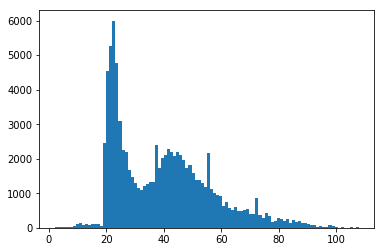

In [7]:
plt.hist(df["age"].dropna(),bins=100)
plt.show()

In [8]:
# Apprantly, age close to 0 and above 100 contain errors.
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    fence_low  = q1-1.5*(q3-q1)
    fence_high = q3+1.5*(q3-q1)
    a = df_in['age'].loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    print(a.sort_values())
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [9]:
df = remove_outlier(df,'age')

3575736     90.0
5383953     90.0
2943657     90.0
5372292     90.0
3979267     90.0
5758867     90.0
1509675     90.0
5329722     90.0
1467803     90.0
4068201     90.0
2939791     90.0
4083499     90.0
1450930     90.0
5741744     90.0
2877993     90.0
510562      90.0
4112894     90.0
6858768     90.0
6919935     90.0
4129772     90.0
6863215     90.0
1336489     90.0
4171358     90.0
4673697     90.0
5728823     90.0
826226      90.0
830284      90.0
4686734     90.0
5714759     90.0
4811521     90.0
           ...  
1441786    102.0
4049622    102.0
2951732    102.0
3583594    102.0
6936808    102.0
5281837    102.0
5292951    102.0
818684     102.0
5670017    102.0
6970527    103.0
5686907    103.0
3647724    105.0
3779620    105.0
493241     105.0
1383458    105.0
4928976    105.0
762026     105.0
3014588    105.0
2018612    105.0
5593953    105.0
5321869    108.0
4087489    108.0
6901591    108.0
2931077    108.0
2094816    108.0
1460233    108.0
414331     108.0
5707584    108

In [10]:
# However still not as good because there are age close to 0, we only want those age between 15 and 80
df = df.loc[(df['age'] > 15) & (df['age'] < 80)]

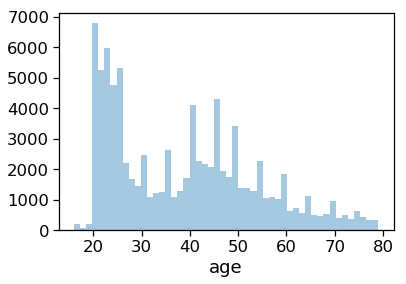

In [11]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.distplot(df["age"].dropna(),bins=50,kde=False,)

In [12]:
# It turns out that age which is not in the desired range help solve 
# the NA problem of many columns, the result is shown:
df.isnull().any()

ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                      True
age                      False
ind_nuevo                False
antiguedad               False
indrel                   False
indrel_1mes               True
tiprel_1mes               True
indresi                  False
indext                   False
conyuemp                  True
canal_entrada             True
indfall                  False
tipodom                  False
cod_prov                  True
ind_actividad_cliente    False
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme_fin_ult1        False
ind_dela_fin_ult1        False
ind_ecue

### Drop/Fill in NA values

In [13]:
# Province Code N/A
df.cod_prov.unique()

array([27.,  2., 28., 15., 45., 16.,  6., 29.,  3., 50., 32., 36., 47.,
       25., 12., 13., 46., 34., 19.,  8., 14., 43., 11., 41., 10., 21.,
        7., 33., 35., 37.,  5., 30., 49.,  9., 17., 18., 42., 31., 40.,
       48., 39., 26., 22.,  4., 44., 24., 38., 23.,  1., 20., nan, 52.,
       51.])

In [14]:
df.loc[df.cod_prov.isnull(),"cod_prov"] = -100.
df.cod_prov.unique()

array([  27.,    2.,   28.,   15.,   45.,   16.,    6.,   29.,    3.,
         50.,   32.,   36.,   47.,   25.,   12.,   13.,   46.,   34.,
         19.,    8.,   14.,   43.,   11.,   41.,   10.,   21.,    7.,
         33.,   35.,   37.,    5.,   30.,   49.,    9.,   17.,   18.,
         42.,   31.,   40.,   48.,   39.,   26.,   22.,    4.,   44.,
         24.,   38.,   23.,    1.,   20., -100.,   52.,   51.])

In [15]:
# Renta ~ Gross Income
df.renta.isnull().sum()

15676

In [16]:
# Replace NA value by province mdedian
df['renta'] = df['renta'].fillna(df.groupby('cod_prov')['renta'].transform(lambda x: x.fillna(x.median())))

In [17]:
#In case when the whole province renta is NA, we fill them with whole median
df.loc[df.renta.isnull(), "renta"] = df.renta.median(skipna = True)

In [18]:
df.isnull().any()

ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                      True
age                      False
ind_nuevo                False
antiguedad               False
indrel                   False
indrel_1mes               True
tiprel_1mes               True
indresi                  False
indext                   False
conyuemp                  True
canal_entrada             True
indfall                  False
tipodom                  False
cod_prov                 False
ind_actividad_cliente    False
renta                    False
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme_fin_ult1        False
ind_dela_fin_ult1        False
ind_ecue

In [19]:
df.loc[df.indrel_1mes.isnull()]
df.indrel_1mes.isnull().sum()

1008

In [20]:
# Deal with boolean indicator of features
# indrel_1mes
df.indrel_1mes.unique()

array([1.0, '1.0', '1', '3', '3.0', nan, 'P', 2.0, 3.0, '2.0'],
      dtype=object)

In [21]:
# Take further look into indrel_1mes NA values
df.loc[df.indrel_1mes.isnull()]

,ncodpers,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
4582818,1417132,N,ES,V,20.0,1,0,1.0,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
4582830,1417169,N,ES,V,29.0,1,0,1.0,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
4582921,1417272,N,ES,H,20.0,1,0,1.0,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
4583036,1416854,N,ES,H,20.0,1,0,1.0,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
4583116,1417036,N,ES,H,20.0,1,0,1.0,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
4583125,1416940,N,ES,V,20.0,1,0,1.0,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
4583304,1417693,N,ES,V,20.0,1,0,1.0,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
4583373,1417335,N,ES,H,19.0,1,0,1.0,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
4583401,1417331,N,ES,V,21.0,1,0,1.0,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
4583408,1417294,N,ES,H,20.0,1,0,1.0,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0


In [22]:
print(df.indrel_1mes.isnull().sum(), df.tiprel_1mes.isnull().sum())

1008 1008


In [23]:
# Thus it is possible that entries missing indrel_1mes values also miss tiprel_1mes values
# We decide to drop NA entries to see the result
df.dropna(subset = ['indrel_1mes'],inplace = True)

In [24]:
print(df.indrel_1mes.isnull().sum(), df.tiprel_1mes.isnull().sum())

0 0


In [25]:
# Create a map of similar values onto the same one
indrel_1mes_dict = { 1.0 : "1", "1.0" : "1", "3.0" : "3", 3.0 : "3", 2.0 : "2", "2.0" : "2", "4.0" : "4"}
df.indrel_1mes = df.indrel_1mes.apply(lambda x: indrel_1mes_dict.get(x,x))
df.indrel_1mes = df.indrel_1mes.astype("category")

In [26]:
df.indrel_1mes.unique()

[1, 3, P, 2]
Categories (4, object): [1, 3, P, 2]

In [27]:
# sexo
df.sexo.isnull().sum()

10

In [28]:
# For sexo column, the NA number is so small so that we drop the rows. 
df.dropna(subset = ['sexo'],inplace = True)

In [29]:
# Take further look into indrel_1mes NA values
print(df.conyuemp.isnull().sum(),
      df.canal_entrada.isnull().sum(),
      df.segmento.isnull().sum(),
      df.ind_nomina_ult1.isnull().sum(),
      df.ind_nom_pens_ult1.isnull().sum())

87782 184 183 1 1


In [30]:
df.shape

(87793, 44)

In [31]:
# Since we have in total 87793 rows and 87782 are NaN for conyuemp, we decide to drop the column. 
# For the rest, since the number is so small, we also decide to drop the rows. 
df.drop('conyuemp',axis = 1,inplace = True)
df.dropna(subset = ['canal_entrada','segmento','ind_nomina_ult1','ind_nom_pens_ult1'],inplace = True)

In [32]:
df.isnull().any()

ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                     False
age                      False
ind_nuevo                False
antiguedad               False
indrel                   False
indrel_1mes              False
tiprel_1mes              False
indresi                  False
indext                   False
canal_entrada            False
indfall                  False
tipodom                  False
cod_prov                 False
ind_actividad_cliente    False
renta                    False
segmento                 False
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme_fin_ult1        False
ind_dela_fin_ult1        False
ind_ecue_fin_ult1        False
ind_fond

# Random forest

In [33]:
# columns to be used as features #
#tiprel_1mes and ind_actividad_cliente are highly negatively correlated, so drop ind_actividad_cliente (less informative)
#ncodpers and canal_entrada are highly positively correlated, so drop ncodpers (less informative)
#age and [segmento, canal_entrada] are highly positively correlated, so drop segmento and canal_entrada
#cod_prov and indresi are highly positively correlated, so drop indresi (less informative)
feature_cols = ["ind_empleado","pais_residencia","sexo","age", "ind_nuevo", "antiguedad","indrel","indrel_1mes","tiprel_1mes","indext","ind_nuevo","indfall","tipodom","cod_prov","renta"]
dtype_list = {'ind_cco_fin_ult1': 'float16', 'ind_deme_fin_ult1': 'float16', 'ind_aval_fin_ult1': 'float16', 'ind_valo_fin_ult1': 'float16', 'ind_reca_fin_ult1': 'float16', 'ind_ctju_fin_ult1': 'float16', 'ind_cder_fin_ult1': 'float16', 'ind_plan_fin_ult1': 'float16', 'ind_fond_fin_ult1': 'float16', 'ind_hip_fin_ult1': 'float16', 'ind_pres_fin_ult1': 'float16', 'ind_nomina_ult1': 'float16', 'ind_cno_fin_ult1': 'float16', 'ncodpers': 'int64', 'ind_ctpp_fin_ult1': 'float16', 'ind_ahor_fin_ult1': 'float16', 'ind_dela_fin_ult1': 'float16', 'ind_ecue_fin_ult1': 'float16', 'ind_nom_pens_ult1': 'float16', 'ind_recibo_ult1': 'float16', 'ind_deco_fin_ult1': 'float16', 'ind_tjcr_fin_ult1': 'float16', 'ind_ctop_fin_ult1': 'float16', 'ind_viv_fin_ult1': 'float16', 'ind_ctma_fin_ult1': 'float16'}
target_cols = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1','ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1','ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1','ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1'] 
model_accuracy = []
# split the train data to have a sense of accuray, we want to achieve an accuracy over 0.8.
Train, Dev = train_test_split(df, test_size=0.3)
# Can change the length of training set that we want to use
start_index = 0
for ind, col in enumerate(feature_cols):
    train = Train.loc[:,col]
    test = Dev.loc[:,col]
    if train.dtype == "object":
        le = preprocessing.LabelEncoder()
        le.fit(list(train.values) + list(test.values))
        temp_train_X = le.transform(list(train.values)).reshape(-1,1)[start_index:,:]
        temp_test_X = le.transform(list(test.values)).reshape(-1,1)
    else:
        temp_train_X = np.array(train).reshape(-1,1)[start_index:,:]
        temp_test_X = np.array(test).reshape(-1,1)
    if ind == 0:
        train_X = temp_train_X.copy()
        test_X = temp_test_X.copy()
    else:
        train_X = np.hstack([train_X, temp_train_X])
        test_X = np.hstack([test_X, temp_test_X])
train_y = Train.loc[:,target_cols]
# model = ensemble.RandomForestClassifier(n_estimators=10, max_depth=10, min_samples_leaf=10, n_jobs=4, random_state=2016)
model = ensemble.RandomForestClassifier(random_state = 22)
model.fit(train_X, train_y)
test_Y = Dev.loc[:,target_cols]
preds = model.predict(test_X)
print("The model has an accuracy of " + str(model.score(test_X,test_Y)))
# Calculate metrics for each instance, and find their average
print("The F1 score is " + str(f1_score(np.array(test_Y), preds,average = 'micro')))

/Users/aaronyan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The model has an accuracy of 0.876374567177809
The F1 score is 0.9378468899521532


Feature ranking:
1. feature ind_empleado (0.290176)
2. feature pais_residencia (0.283886)
3. feature sexo (0.226600)
4. feature age (0.112942)
5. feature ind_nuevo (0.058772)
6. feature antiguedad (0.013573)
7. feature indrel (0.005918)
8. feature indrel_1mes (0.002020)
9. feature tiprel_1mes (0.001590)
10. feature indext (0.001561)
11. feature ind_nuevo (0.001332)
12. feature indfall (0.000825)
13. feature tipodom (0.000803)
14. feature cod_prov (0.000003)
15. feature renta (0.000000)


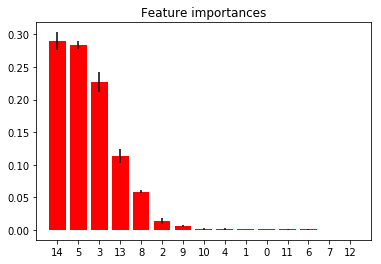

In [34]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_cols[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(train_X.shape[1]), indices)
plt.xlim([-1, train_X.shape[1]])
plt.show()

In [35]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,30]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [127]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model = ensemble.RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=22, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_X, train_y)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


/Users/aaronyan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   52.7s
/Users/aaronyan/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.9min
/Users/aaronyan/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can b

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=22, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [128]:
rf_random.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [132]:
model = ensemble.RandomForestClassifier(bootstrap = False,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split = 2,
 random_state = 22)
model.fit(train_X, train_y)
test_Y = Dev.loc[:,target_cols]
preds = model.predict(test_X)
print("The model has an accuracy of " + str(model.score(test_X,test_Y)))
# Calculate metrics for each instance, and find their average
print("The F1 score is " + str(f1_score(np.array(test_Y), preds,average = 'micro')))

/Users/aaronyan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The model has an accuracy of 0.8931547505802672
The F1 score is 0.9491924269975398


# XGBoost model

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [37]:
xgb_train_y = np.array(train_y)
new_train_y = np.zeros((xgb_train_y.shape[0]))
for i in range(xgb_train_y.shape[0]):
    for j in range(xgb_train_y.shape[1]):
        if xgb_train_y[i][j] == 1:
            new_train_y[i] = j
new_train_y

array([ 2.,  2.,  2., ..., 23.,  2.,  7.])

In [46]:
xgb_test_y = np.array(test_Y)
new_test_y = np.zeros((xgb_test_y.shape[0]))
for i in range(xgb_test_y.shape[0]):
    for j in range(xgb_test_y.shape[1]):
        if xgb_test_y[i][j] == 1:
            new_test_y[i] = j
new_test_y

array([18., 23.,  2., ...,  4.,  2.,  2.])

In [38]:
model = GradientBoostingClassifier()

In [39]:
model.fit(train_X, new_train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [54]:
y_pred = model.predict(test_X)
print("The model has an accuracy of " + str(model.score(test_X,new_test_y)))
# Calculate metrics for each instance, and find their average
print("The F1 score is " + str(f1_score(new_test_y, y_pred, average = 'micro')))

The model has an accuracy of 0.6455233819108862
The F1 score is 0.6455233819108862


In [53]:
model.feature_importances_

array([0.00063268, 0.00365956, 0.00335078, 0.40039968, 0.00401465,
       0.2291998 , 0.00180161, 0.        , 0.22926757, 0.00249117,
       0.00398419, 0.00072331, 0.        , 0.03371615, 0.08675884])